# 1 Load the Data

In [5]:
# Setting up packages for data manipulation and machine learning
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm, pyplot
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, classification_report
import seaborn as sns

# Load train data
# label: Revenue
filepath = "data/classification-online-shopping/online_shoppers_intention.csv"
dfshopping = pd.read_csv(filepath)

# 2 Exploring the data

In [2]:
print(dfshopping.shape)
dfshopping.head(5)

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Replacing visitor_type to int
print(dfshopping['VisitorType'].unique())
dfshopping = dfshopping.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

# Coverting month column to numeric numeric values
df = dfshopping.copy()
monthlist = dfshopping['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
df['Month'] =  mlist
df

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,False,False


In [4]:
#print(df.isnull().sum())
#df.isna().sum()
# Delete records with NAs
df.dropna(inplace=True)

In [5]:
# Checking the balance of labels
df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

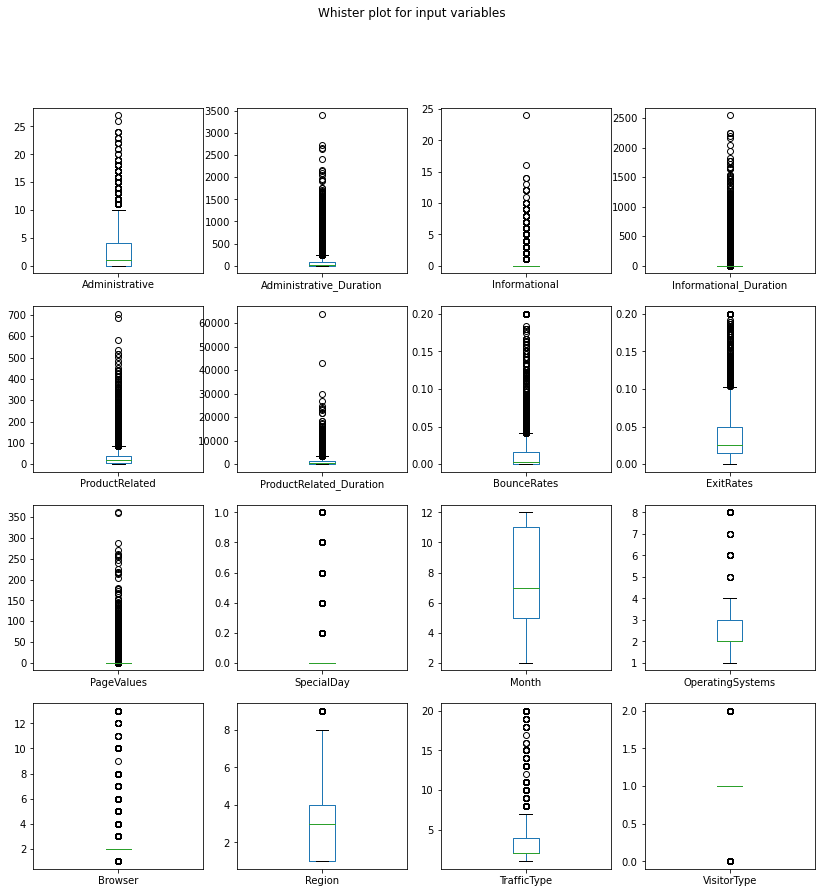

In [6]:
# Whiskerplots
c= 'black'
df.drop('Revenue', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,14), 
                                        title='Whister plot for input variables')
plt.savefig('shopping_box')
plt.show()

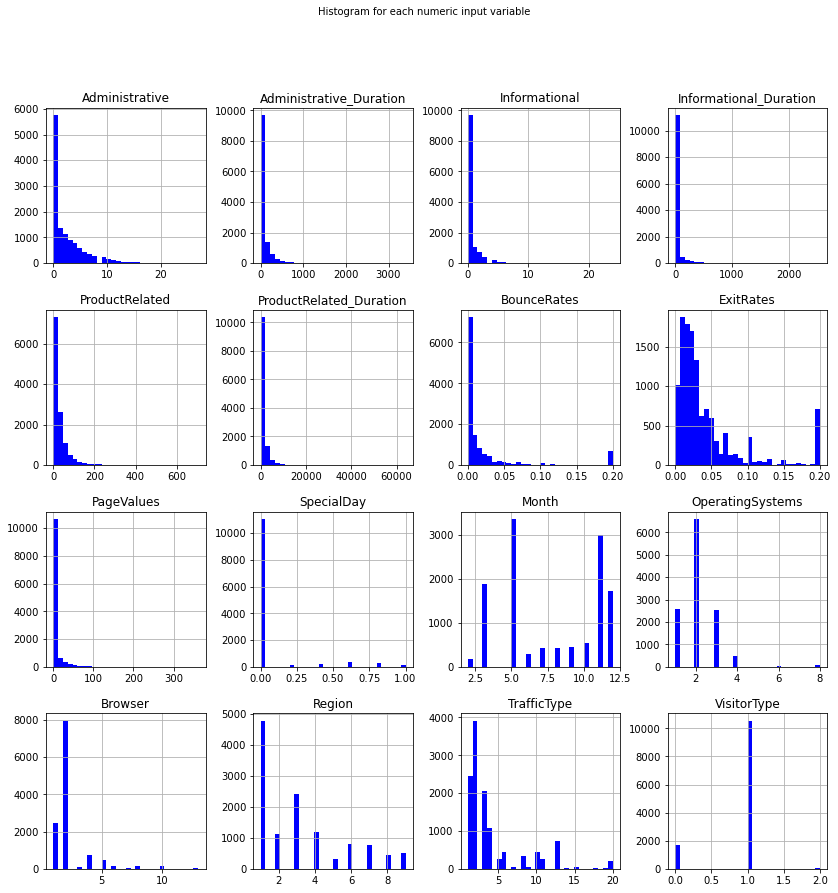

In [7]:
# Histograms
df.drop(['Revenue', 'Weekend'], axis=1).hist(bins=30, figsize=(14, 14), color='blue')
plt.suptitle("Histogram for each numeric input variable", fontsize=10)
plt.savefig('shopping_hist')
plt.show()

# 3 Data Preprocessing

In [8]:
# Separate labels from training data
features = ['Administrative', 'Administrative_Duration', 'Informational', 
            'Informational_Duration', 'ProductRelated', 'ProductRelated', 
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
            'Month', 'Region', 'TrafficType', 'VisitorType']
X = df[features] #Training data
y = df['Revenue'] #Prediction label

In [9]:
# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Scale the numeric values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4 Train a Logistic Regression Prediction Model

In [10]:
# Training a classification model using logistic regression 
logreg = LogisticRegression(solver='lbfgs')
score = logreg.fit(X_train, y_train).decision_function(X_test)

# 5 Evaluate Model Performance

Text(0.5, 384.16, 'Predicted label')

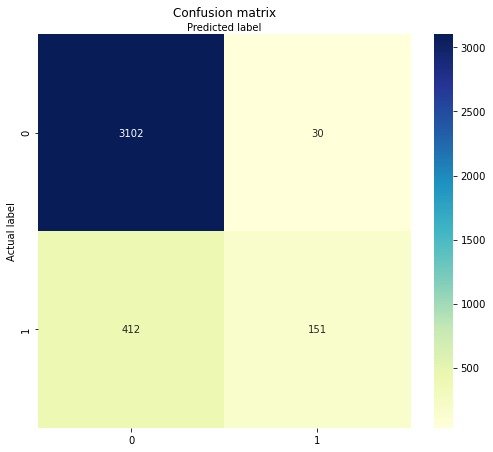

In [11]:
# create a confusion matrix
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# create heatmap
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.88
Precision: 0.83
Recall: 0.27
f1_score: 0.41


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.867


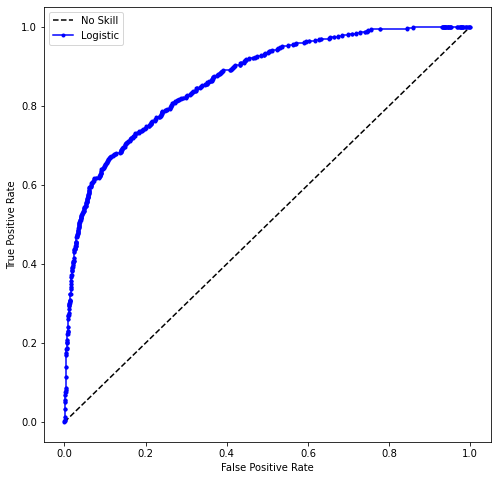

In [13]:
# Compute ROC curve and ROC area for each class
# generate a no skill prediction (majority class)
ns_probabilities = [0 for _ in range(len(y_test))]

# predict probabilities and keep probabilities for the positive outcome only
lr_probabilities = logreg.predict_proba(X_test)
lr_probabilities = lr_probabilities[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probabilities)
lr_auc = roc_auc_score(y_test, lr_probabilities)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
fig = plt.subplots(figsize=(8, 8))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probabilities)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color = 'black')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color = 'blue')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.legend()
plt.show()